![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

In [31]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [32]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [33]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

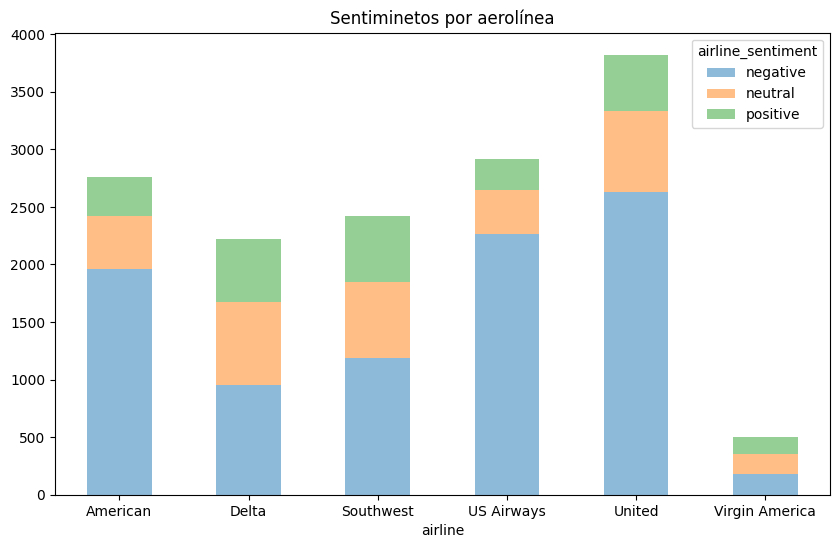

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

In [34]:
tweets.describe()

,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,14640.000000,10522.000000,14640.000000
mean,0.900169,0.638298,0.082650
std,0.162830,0.330440,0.745778
min,0.335000,0.000000,0.000000
25%,0.692300,0.360600,0.000000
50%,1.000000,0.670600,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,44.000000


### Liberias y Variables de interés y predicción

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import metrics

In [36]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [37]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [24]:
# Creación de matrices de documentos usando CountVectorizer a partir de X
CountVec = CountVectorizer()

In [33]:
#CountVecTr = CountVec.transform(X_train)
CountVecX = CountVec.fit_transform(X_train)
CountVecTe = CountVec.transform(X_test)

In [ ]:
CountVec.vocabulary_

In [35]:
# Creamos el objeto de Regresión Linear
RclCV = RandomForestClassifier(max_depth=10, n_estimators=200)

In [38]:
# Entrenamos nuestro modelo
RclCV.fit(CountVecX, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [39]:
# Hacemos las predicciones que en definitiva una línea
yPred = RclCV.predict(CountVecTe)

In [59]:
X_test['Predicted']=RclCV.predict(CountVecTe)

In [60]:
# Error ACCURACY
CountVectorizer = metrics.accuracy_score(y_test, yPred)
print("Mean squared error:" , CountVectorizer)

Mean squared error: 0.6384519867549668


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [51]:
#CounVecSW= CountVectorizer(max_df=0.95, min_df=2,stop_words='english')
CounVecSW= CountVectorizer(stop_words='english')

In [52]:
# Impresión de stopwords del texto
print(CounVecSW.get_stop_words())

frozenset({'move', 'part', 'for', 'thru', 'becoming', 'again', 'five', 'take', 'more', 'not', 'its', 'call', 'anything', 'amoungst', 'together', 'fifty', 'under', 'such', 'third', 'either', 'whereby', 'must', 'latterly', 'him', 'sometimes', 'often', 'below', 'describe', 'could', 'why', 'beyond', 'several', 're', 'those', 'anyway', 'their', 'about', 'being', 'hereafter', 'give', 'never', 'de', 'therein', 'towards', 'one', 'they', 'even', 'nowhere', 'becomes', 'fifteen', 'however', 'where', 'further', 'whoever', 'see', 'anyone', 'ie', 'when', 'otherwise', 'whence', 'how', 'top', 'thick', 'would', 'in', 'empty', 'all', 'themselves', 'thereafter', 'yours', 'ourselves', 'these', 'else', 'this', 'mine', 'before', 'whereupon', 'seem', 'bill', 'the', 'thence', 'per', 'found', 'you', 'while', 'moreover', 'nevertheless', 'un', 'due', 'on', 'few', 'what', 'same', 'upon', 'another', 'find', 'nobody', 'no', 'whatever', 'whereas', 'here', 'etc', 'sometime', 'made', 'beforehand', 'any', 'former', 'eg

In [53]:
CountVecSWX = CounVecSW.fit_transform(X_train)
CountVecSWTe = CounVecSW.transform(X_test)

In [ ]:
CounVecSW.vocabulary_

In [57]:
# Creamos el objeto de Regresión Linear
RclSW = RandomForestClassifier()

In [58]:
# Entrenamos nuestro modelo
RclSW.fit(CountVecSWX, y_train)

RandomForestClassifier()

In [60]:
# Hacemos las predicciones que en definitiva una línea
yPredSW = RclSW.predict(CountVecSWTe)

In [61]:
# Error ACCURACY
CountVectorizerSW = metrics.accuracy_score(y_test, yPredSW)
print("Mean squared error:" , CountVectorizerSW)

Mean squared error: 0.7601407284768212


### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [74]:
# Inicialización de stemmer
stemmer = SnowballStemmer('english')

In [75]:
# Creación de matrices de documentos usando CountVectorizer a partir de X
vect = CountVectorizer()
vect.fit(X)

CountVectorizer()

In [76]:
words = list(CounVecSW.vocabulary_.keys())

In [77]:
print([stemmer.stem(word) for word in words])

['jetblu', 'cours', 'americanair', 'complt', 'incompet', 'flt', '295', 'lav', 'delay', 'pln', 'lnded', 'nite', 'internet', 'poor', 'svc', 'expect', 'southwestair', 'flight', '4968', 'n8325d', 'depart', 'mco', 'enrout', 'no_airport', 'http', 'fd4snvkiem', 'usairway', 'doe', 'airlin', 'know', 'job', 'unit', 'want', 'plane', 'dad', '386', 'dalla', 'jacksonvill', 'fl', 'cancel', 'flightl', 'notifi', 'go', 'tri', 'make', 'probabl', 'late', 'did', 'email', 'pittsburgh', 'intern', 'look', 'forward', 'jb', 'rt', 'bostongarden', 'look', 'welcom', 'onboard', 'abil', 'switch', 'tell', 'bag', 'refus', 'board', 'nexus', 'confirm', 'thank', 'cud', 'answer', '140', 'plenti', 'inflight', 'steal', 'right', 'amp', 'fa', 'won', 'uncomfort', 'convo', 'pass', 'roundtrip', 'london', 'delta', 'think', 'fyi', '1k', 'just', 'lost', 'moneynotspentonunit', 'unfriendlyski', 'hung', 'custom', 'servic', 'wait', '30', 'min', 'hold', 'guess', 'vacat', 'happen', 'websit', 'wasn', 'work', 'hey', 'left', 'comput', 'bag'

In [78]:
# Celda 3
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [79]:
# Obtención e impresión de los lemas de cada palabra de la lista asumiendo que cada palabra es un sustantivo
print([wordnet_lemmatizer.lemmatize(word) for word in words])

['jetblue', 'course', 'americanair', 'complt', 'incompetence', 'flt', '295', 'lav', 'delay', 'pln', 'lnded', 'nite', 'internet', 'poor', 'svc', 'expect', 'southwestair', 'flight', '4968', 'n8325d', 'departs', 'mco', 'enroute', 'no_airport', 'http', 'fd4snvkiem', 'usairways', 'doe', 'airline', 'know', 'job', 'united', 'want', 'plane', 'dad', '386', 'dallas', 'jacksonville', 'fl', 'cancelled', 'flightled', 'notified', 'going', 'trying', 'make', 'probably', 'late', 'did', 'email', 'pittsburgh', 'international', 'look', 'forward', 'jb', 'rt', 'bostongarden', 'looking', 'welcoming', 'onboard', 'ability', 'switch', 'tell', 'bag', 'refused', 'boarding', 'nexus', 'confirmed', 'thank', 'cud', 'answer', '140', 'plenty', 'inflight', 'stealing', 'right', 'amp', 'fa', 'won', 'uncomfortable', 'convo', 'pas', 'roundtrip', 'london', 'delta', 'think', 'fyi', '1k', 'just', 'lost', 'moneynotspentonunited', 'unfriendlyskies', 'hung', 'customer', 'service', 'waiting', '30', 'min', 'hold', 'guess', 'vacatio

In [80]:
# Obtención e impresión de los lemas de cada palabra de la lista asumiendo que cada palabra es un verbo
print([wordnet_lemmatizer.lemmatize(word,pos='v') for word in words])

['jetblue', 'course', 'americanair', 'complt', 'incompetence', 'flt', '295', 'lav', 'delay', 'pln', 'lnded', 'nite', 'internet', 'poor', 'svc', 'expect', 'southwestair', 'flight', '4968', 'n8325d', 'depart', 'mco', 'enroute', 'no_airport', 'http', 'fd4snvkiem', 'usairways', 'do', 'airline', 'know', 'job', 'unite', 'want', 'plane', 'dad', '386', 'dallas', 'jacksonville', 'fl', 'cancel', 'flightled', 'notify', 'go', 'try', 'make', 'probably', 'late', 'do', 'email', 'pittsburgh', 'international', 'look', 'forward', 'jb', 'rt', 'bostongarden', 'look', 'welcome', 'onboard', 'ability', 'switch', 'tell', 'bag', 'refuse', 'board', 'nexus', 'confirm', 'thank', 'cud', 'answer', '140', 'plenty', 'inflight', 'steal', 'right', 'amp', 'fa', 'win', 'uncomfortable', 'convo', 'pass', 'roundtrip', 'london', 'delta', 'think', 'fyi', '1k', 'just', 'lose', 'moneynotspentonunited', 'unfriendlyskies', 'hang', 'customer', 'service', 'wait', '30', 'min', 'hold', 'guess', 'vacation', 'happen', 'website', 'wasn'

In [81]:
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

In [83]:
# Creación de matrices de documentos usando CountVectorizer, usando el parámetro 'split_into_lemmas'
CounVecLe = CountVectorizer(analyzer=split_into_lemmas)

In [84]:
CountVecLeX = CounVecLe .fit_transform(X_train)
CountVecLeTe = CounVecLe .transform(X_test)

In [ ]:
CounVecLe.vocabulary_

In [86]:
# Creamos el objeto de Regresión Linear
RclLe = RandomForestClassifier()

In [88]:
# Entrenamos nuestro modelo
RclLe.fit(CountVecLeX, y_train)

RandomForestClassifier()

In [89]:
# Hacemos las predicciones que en definitiva una línea
yPredLe = RclSW.predict(CountVecLeTe)

In [90]:
# Error ACCURACY
CountVectorizerLe = metrics.accuracy_score(y_test, yPredLe)
print("Mean squared error:" , CountVectorizerLe)

Mean squared error: 0.7580711920529801


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [ ]:
# Celda 5
